# 0. Data Integration: Combining All Views

This notebook loads the feature data from the three different sources (original side view, new side view, new top view), preprocesses each, adds identifying suffixes, and merges them into a single master dataframe aligned by plant and day.

This integrated dataframe is the foundation for the comparative analyses.

In [ ]:
import pandas as pd
import numpy as np
import sys
import os
from src.data_processing import load_preprocess_and_merge_all

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [ ]:
path_side_old = '../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features.csv' 
path_side_new = '../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features 10-15-2025.csv' 
path_top_new  = '../data/5.25.2024_CBI.0010_York_Poplar_RGB.top_features 10-15-2025.csv' 
path_barcode = '../data/barcodes--5.25.2024_CBI.0010_York_Poplar.csv'
# Define corresponding suffixes
feature_paths = [path_side_old, path_side_new, path_top_new]
suffixes = ['_side_old', '_side_new', '_top_new']

In [4]:
# Run the Integration Function
merged_df_all = load_preprocess_and_merge_all(
    paths=feature_paths,
    suffixes=suffixes,
    barcode_path=path_barcode,
    experiment_start_str='2024-05-26 00:00:00'
)

Processed: ../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features.csv with suffix _side_old
Processed: ../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features 10-15-2025.csv with suffix _side_new
Processed: ../data/5.25.2024_CBI.0010_York_Poplar_RGB.top_features 10-15-2025.csv with suffix _top_new

Final merged dataframe shape: (3431, 166)


In [ ]:
# Inspect the Merged Data 
if merged_df_all is not None:
    print("\n--- Merged Dataframe Head ---")
    display(merged_df_all.head())

    print("\n--- Merged Dataframe Info ---")
    merged_df_all.info()

    print("\n--- Missing Values per Column (First 50) ---")
    print(merged_df_all.isnull().sum().head(50))
else:
    print("Data merging failed. Please check file paths and previous error messages.")


--- Merged Dataframe Head ---


,Plant Info,Days_Since_2024_05_26,Date,Plant.Genotype,Round Order_side_old,area_side_old,convex_hull_area_side_old,solidity_side_old,perimeter_side_old,width_side_old,...,saturation_mean_top_new,saturation_var_top_new,saturation_max_top_new,value_mean_top_new,value_var_top_new,value_min_top_new,value_max_top_new,Decimal Days_top_new,Replication_top_new,Random_top_new
0,100_BESC-1025_7,1,2024-05-27,BESC-1025,4,231928.0,1634535.0,0.141892,24845.720440,1275,...,41.282573,-1.023182e-14,100.0,21.980412,3.907985e-16,6.27,49.41,1.787130,7.0,100.0
1,100_BESC-1025_7,6,2024-06-01,BESC-1025,15,320677.0,1701823.0,0.188431,21140.272610,1161,...,42.503670,-2.273737e-15,100.0,20.331912,-3.552714e-16,6.27,45.49,6.735775,7.0,100.0
2,100_BESC-1025_7,10,2024-06-05,BESC-1025,23,416727.0,2124155.5,0.196185,24253.601390,1493,...,44.188695,4.547474e-15,100.0,19.854070,-3.002043e-15,6.27,49.80,10.733773,7.0,100.0
3,100_BESC-1025_7,14,2024-06-09,BESC-1025,31,600202.0,2767716.0,0.216858,26520.958951,1838,...,44.303935,4.547474e-15,100.0,19.082170,-3.463896e-15,6.27,46.67,14.764919,7.0,100.0
4,100_BESC-1025_7,18,2024-06-13,BESC-1025,40,639832.0,3252114.0,0.196743,34943.786968,1920,...,47.247999,1.023182e-14,100.0,21.051799,8.171241e-16,6.27,45.10,18.771968,7.0,100.0



--- Merged Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Columns: 166 entries, Plant Info to Random_top_new
dtypes: datetime64[ns](1), float64(144), int64(19), object(2)
memory usage: 4.3+ MB

--- Missing Values per Column (First 50) ---
Plant Info                       0
Days_Since_2024_05_26            0
Date                             0
Plant.Genotype                   0
Round Order_side_old             0
area_side_old                    0
convex_hull_area_side_old        0
solidity_side_old                0
perimeter_side_old               0
width_side_old                   0
height_side_old                  0
longest_path_side_old            0
center_of_mass_x_side_old        0
center_of_mass_y_side_old        0
convex_hull_vertices_side_old    0
ellipse_center_x_side_old        0
ellipse_center_y_side_old        0
ellipse_major_axis_side_old      0
ellipse_minor_axis_side_old      0
ellipse_angle_side_old           0
ellipse_eccent

In [6]:
# Save the Merged Data 
if merged_df_all is not None:
    # Ensure results directory exists
    os.makedirs('../results/data', exist_ok=True)
    
    save_path = '../results/data/merged_all_datasets.csv'
    merged_df_all.to_csv(save_path, index=False)
    print(f"\nMerged dataframe saved successfully to: {save_path}")


Merged dataframe saved successfully to: ../results/data/merged_all_datasets.csv


### Dataset Merge Overview

This code below loads the newly extracted side view APPL phenotype dataset (`appl_phenotypes.csv`) and merges it with the `barcodes.csv` file that maps each plant's unique barcode to its genotype information.  

Outputs:
- `data_merged_full_clean.csv`
- `data_genotype_daily.csv`
- `data_plant_mean.csv`


Phenotypes shape: (3415, 56)
Barcodes shape: (464, 5)
Merged shape: (3415, 60)
Unique barcodes: 446
Unique genotypes: 60
Missing genotype entries: 7
Removed 7 rows missing genotypes.
Final shape: (3408, 60)
✅ Saved processed CSVs to: c:\Users\katie\OneDrive - East Tennessee State University\School\Data-Saplings-Organized\data\processed


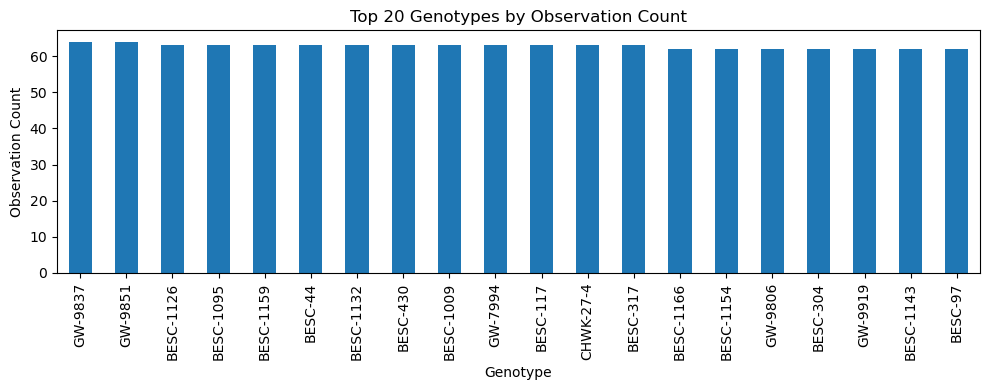

In [ ]:
# =========================================================
# Notebook 00: Merge New Side View Dataset
# =========================================================

import pandas as pd
from pathlib import Path

# ---------------------------------------------------------
# 1. Define paths
# ---------------------------------------------------------
ROOT = Path.cwd()
if "notebooks" in str(ROOT):
    ROOT = ROOT.parent 
    
DATA_RAW = ROOT / "data"
DATA_PROCESSED = DATA_RAW / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 2. Load data
# ---------------------------------------------------------
phenotypes = pd.read_csv(DATA_RAW / "../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features 10-15-2025.csv")
barcodes = pd.read_csv(DATA_RAW / "../data/barcodes--5.25.2024_CBI.0010_York_Poplar.csv")

print("Phenotypes shape:", phenotypes.shape)
print("Barcodes shape:", barcodes.shape)

# ---------------------------------------------------------
# 3. Standardize and clean key columns
# ---------------------------------------------------------
# Use 'Plant Info' as the linking column in both datasets
phenotypes = phenotypes.rename(columns={"Plant Info": "barcode"})
barcodes = barcodes.rename(columns={"Plant.Info": "barcode", "Plant.Genotype": "genotype"})

# Clean up formatting for consistency
phenotypes['barcode'] = phenotypes['barcode'].astype(str).str.strip().str.upper()
barcodes['barcode'] = barcodes['barcode'].astype(str).str.strip().str.upper()

# Drop any duplicate barcode entries in the barcode file
barcodes = barcodes.drop_duplicates(subset='barcode')

# ---------------------------------------------------------
# 4. Merge the datasets
# ---------------------------------------------------------
merged = pd.merge(phenotypes, barcodes, on='barcode', how='left')

print("Merged shape:", merged.shape)
print("Unique barcodes:", merged['barcode'].nunique())
print("Unique genotypes:", merged['genotype'].nunique())
print("Missing genotype entries:", merged['genotype'].isna().sum())

# ---------------------------------------------------------
# 5. Remove missing genotypes (if necessary)
# ---------------------------------------------------------
merged_clean = merged.dropna(subset=['genotype'])
print(f"Removed {merged.shape[0] - merged_clean.shape[0]} rows missing genotypes.")
print("Final shape:", merged_clean.shape)

# ---------------------------------------------------------
# 6. Save merged datasets
# ---------------------------------------------------------
merged_clean.to_csv(DATA_PROCESSED / "data_merged_full_clean.csv", index=False)

geno_daily = (
    merged_clean.groupby(['genotype', 'Analyse Date'])
    .mean(numeric_only=True)
    .reset_index()
)
geno_daily.to_csv(DATA_PROCESSED / "data_genotype_daily.csv", index=False)

plant_mean = (
    merged_clean.groupby(['barcode', 'genotype'])
    .mean(numeric_only=True)
    .reset_index()
)
plant_mean.to_csv(DATA_PROCESSED / "data_plant_mean.csv", index=False)

print("✅ Saved processed CSVs to:", DATA_PROCESSED)

# ---------------------------------------------------------
# 7. Quick visual check 
# ---------------------------------------------------------
try:
    import matplotlib.pyplot as plt
    merged_clean['genotype'].value_counts().head(20).plot(kind='bar', figsize=(10,4))
    plt.title("Top 20 Genotypes by Observation Count")
    plt.xlabel("Genotype")
    plt.ylabel("Observation Count")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Skipping plot:", e)
